# Add WindSE Directory

This step will not be necessary once WindSE is a pip installable package.

In [1]:
import sys
sys.path.insert(0, '../../dev/')

# Import WindSE

This is where a normal code would actually start.

In [2]:
import WindSE

# Import Option

In [3]:
options = WindSE.LoadOptions("params.yaml")
WindSE.PrintOptions(options)

general
    name:                '20181219_111549-Simple_Test'
    preappend_datetime:  True
    folder:              'output/20181219_111549-Simple_Test/'
wind_farm
    HH:         90
    RD:         126.0
    site_x:     [-2500, 2500]
    site_y:     [-2000, 2000]
    site_z:     [0, 216]
    ex_scale:   0.95
    grid_rows:  6
    grid_cols:  6
    numturbs:   36
    A:          126.0
    alpha:      0.0
    beta:       2173.8621817909
    radius:     63.0
    ex_x:       [-2315.15, 2315.15]
    ex_y:       [-1840.1499999999999, 1840.1499999999999]
domain
    x_range:  [-2500, 2500]
    y_range:  [-2500, 2500]
    z_range:  [0.04, 630]
    nx:       10
    ny:       10
    nz:       2


# Setup Jupyter Plots

Before we plot anything, we need to run this bit of code to make the plots appear inline.

In [4]:
%matplotlib inline

# Create the Domain

Eventually there will be support for importing custom domains.

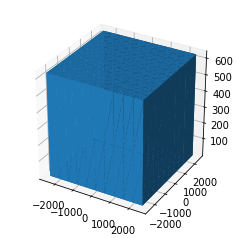

In [5]:
dom = WindSE.BoxDomain(options)
dom.Plot()
dom.Save()

# Setup the Wind Farm

Supported types will be Random, Grid, and Imported. Eventually the z-coordinate will be determined by the topography. 

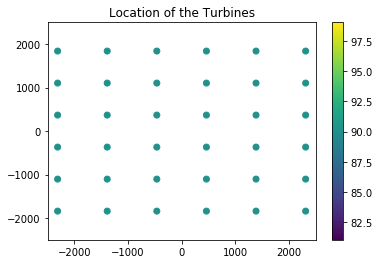

In [6]:
farm = WindSE.GridWindFarm(options,dom)
farm.Plot()

# Create the Function Space

Eventually this will include thinks like Linear, Taylor-Hood and more

In [7]:
fs = WindSE.LinearFunctionSpace(options,dom)

# Create Boundary Conditions

Other types will include, Constant, Power Law, and more

In [8]:
bc = WindSE.LinearInflow(options,dom,fs)

# Consolidate the Problem

This will take in all the domain/windfarm/bc objects and generate the problem the user wants. Each problem type can include different physics and setup.

In [10]:
problem = WindSE.StabilizedProblem(options,dom,farm,fs,bc)

# Solve

In [11]:
solver = WindSE.DefaultSolver(options,problem)
solver.Solve()

# Save and Plot

This is a very small problem to make running this jupyter file quick to run. 

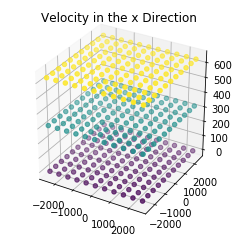

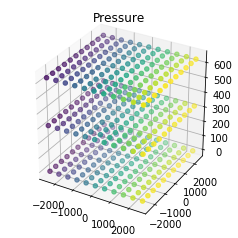

In [12]:
solver.Save()
solver.Plot()